In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("netflix.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### 1. Defining Problem Statement and Analysing basic metrics 
### 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary
### 3. Non-Graphical Analysis: Value counts and unique attributes


As we may know, Netflix is a entertainment video streaming platform which provides it's service worldwide. So, it isimportant to know the certain trends which is going to help the platform grow it's business. Some of the findings we may need to obtain is :

    1. Which country has produced most number of movie/TV show, added on the platform
    2. What is the total number of shows/movies added over year
    3. Which Genre of movie/TV shows are available on the platform
    4. Which Actor & Director has highest number of movie/TV Show added on the platform
    5. Which Actor-Director duo has highest number of movies/Tv shows

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


 Observations : 
    
1. We can see that, the dataset has overall 8807 number of records. However, few of the columns have lesser number of counts, that means those columns have Null values in the dataset. Hence, we can say that dataset has missing values.
2. Columns like Director, cast, listed-in has comma separated values,which we need to separate those into different rows of data to analyze.
3. date_added data is of object type, we need to change it to date format to generate insights out of it
4. duration column has object data type, we need to get integer values out of it to find statistical insights

In [5]:
data2=data.copy()

In [6]:
data2.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
data2['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

> Observation : we can see that country column is also having comma separated values. So, we need to separate it to different rows of data.

In [8]:
data_country=data2.loc[:,['show_id','country']]
data_country.loc[:,'country']=data_country['country'].str.split(',')
data_country=data_country.explode('country')
data_country

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,NaN
3,s4,NaN
4,s5,India
...,...,...
8802,s8803,United States
8803,s8804,NaN
8804,s8805,United States
8805,s8806,United States


> Number of records increased from 8807 to 10850, since we separated comma separated country and created a dataframe with expanded country.

In [9]:
data_country['country'].value_counts()

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Ecuador             1
Iran                 1
Cyprus               1
 Mongolia            1
 Montenegro          1
Name: country, Length: 197, dtype: int64

> Movie / TV shows produced in United States are largely available on the streaming platform.

In [10]:
data2['date_added']=pd.to_datetime(data2['date_added'])

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


> We can see now that date_added column has date-time format data in the dataset

In [12]:
data2['Year_added']=data2['date_added'].dt.year

In [13]:
data2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0


In [14]:
typecount_peryear=data2.groupby(['Year_added','type']).count().sort_values(by='Year_added')['show_id'].reset_index('type').reset_index()
typecount_peryear

,Year_added,type,show_id
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,5
8,2014.0,Movie,19
9,2014.0,TV Show,5


> Above data shows number of Movies/TV Shows added every year. Year is in float because dataset has NaN values.

In [15]:
movie_genre=data2.loc[(data2['type']=='Movie') & (data2['country']=='India')][['show_id','listed_in']]
movie_genre['genre']=movie_genre['listed_in'].str.split(',')
movie_genre=movie_genre.explode('genre')
movie_genre

,show_id,listed_in,genre
24,s25,"Comedies, International Movies, Romantic Movies",Comedies
24,s25,"Comedies, International Movies, Romantic Movies",International Movies
24,s25,"Comedies, International Movies, Romantic Movies",Romantic Movies
105,s106,"Action & Adventure, Comedies, Dramas",Action & Adventure
105,s106,"Action & Adventure, Comedies, Dramas",Comedies
...,...,...,...
8799,s8800,"Dramas, International Movies",Dramas
8799,s8800,"Dramas, International Movies",International Movies
8806,s8807,"Dramas, International Movies, Music & Musicals",Dramas
8806,s8807,"Dramas, International Movies, Music & Musicals",International Movies


In [16]:
movie_genre.drop('listed_in',axis=1,inplace=True)

In [17]:
count_by_genre=movie_genre['genre'].value_counts().reset_index()
count_by_genre

,index,genre
0,International Movies,779
1,Dramas,384
2,Comedies,262
3,Dramas,236
4,Independent Movies,149
5,Action & Adventure,127
6,Romantic Movies,118
7,Thrillers,88
8,Music & Musicals,88
9,Comedies,46


> Genre of movies which were added in the given time period, produced in India.

In [18]:
cast_sep=data2[data2['country']=='India'][["show_id",'cast']]
cast_sep.loc[:,'cast']=cast_sep['cast'].str.split(',')
cast_sep=cast_sep.explode('cast')
cast_sep

,show_id,cast
4,s5,Mayur More
4,s5,Jitendra Kumar
4,s5,Ranjan Raj
4,s5,Alam Khan
4,s5,Ahsaas Channa
...,...,...
8806,s8807,Manish Chaudhary
8806,s8807,Meghna Malik
8806,s8807,Malkeet Rauni
8806,s8807,Anita Shabdish


In [19]:
cast_sep['cast'].value_counts()

 Anupam Kher              36
 Paresh Rawal             24
Shah Rukh Khan            24
 Om Puri                  23
Akshay Kumar              22
                          ..
 Nalneesh Neel             1
 Niloy Sankar Gupta        1
 Shiny Gogoi               1
 Siddharth Boro            1
 Chittaranjan Tripathy     1
Name: cast, Length: 3903, dtype: int64

In [20]:
director_sep=data2[data2['country']=='India'][["show_id",'director']]
director_sep.loc[:,'director']=director_sep['director'].str.split(',')
director_sep=director_sep.explode('director')
director_sep

,show_id,director
4,s5,NaN
24,s25,S. Shankar
39,s40,NaN
50,s51,NaN
66,s67,NaN
...,...,...
8773,s8774,Kedar Shinde
8775,s8776,NaN
8798,s8799,Chandra Prakash Dwivedi
8799,s8800,Avadhoot Gupte


In [21]:
cast_with_Director=cast_sep.merge(director_sep,on='show_id')
cast_with_Director

,show_id,cast,director
0,s5,Mayur More,NaN
1,s5,Jitendra Kumar,NaN
2,s5,Ranjan Raj,NaN
3,s5,Alam Khan,NaN
4,s5,Ahsaas Channa,NaN
...,...,...,...
7944,s8807,Manish Chaudhary,Mozez Singh
7945,s8807,Meghna Malik,Mozez Singh
7946,s8807,Malkeet Rauni,Mozez Singh
7947,s8807,Anita Shabdish,Mozez Singh


In [22]:
cast_with_Director.groupby(['cast','director']).count().sort_values(by='show_id', ascending=False)

,,show_id
cast,director,
Anupam Kher,David Dhawan,6
Alok Nath,Sooraj R. Barjatya,5
Rajpal Yadav,Priyadarshan,4
Rajesh Kava,Rajiv Chilaka,4
Salman Khan,Sooraj R. Barjatya,4
...,...,...
Kochu Preman,Vineeth Anil,1
Kitu Gidwani,Kiran Rao,1
Kishori Shahane,Sachin,1


> Anupam Kher - David Dhawan actor-director duo combination has more number of movies/shows on the streaming platform.

In [23]:
movie_duration=data2.loc[data2['type']=='Movie'][['title','duration']]
movie_duration

,title,duration
0,Dick Johnson Is Dead,90 min
6,My Little Pony: A New Generation,91 min
7,Sankofa,125 min
9,The Starling,104 min
12,Je Suis Karl,127 min
...,...,...
8801,Zinzana,96 min
8802,Zodiac,158 min
8804,Zombieland,88 min
8805,Zoom,88 min


In [24]:
movie_duration['duration_mins']=movie_duration['duration'].dropna().str.split(' ',expand=True)[0].astype('int')
movie_duration.drop('duration',axis=1,inplace=True)
movie_duration

,title,duration_mins
0,Dick Johnson Is Dead,90.0
6,My Little Pony: A New Generation,91.0
7,Sankofa,125.0
9,The Starling,104.0
12,Je Suis Karl,127.0
...,...,...
8801,Zinzana,96.0
8802,Zodiac,158.0
8804,Zombieland,88.0
8805,Zoom,88.0


# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

### 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

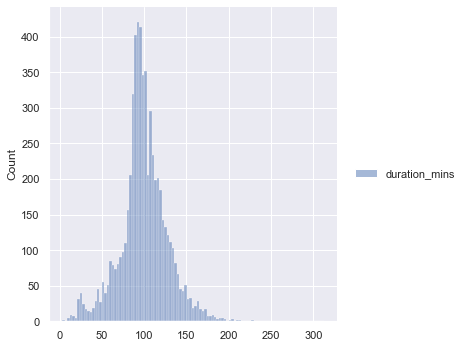

In [25]:
sns.set(rc={"figure.figsize":(12, 5)})
sns.displot(data=movie_duration,kind='hist')

<AxesSubplot:xlabel='rating', ylabel='count'>

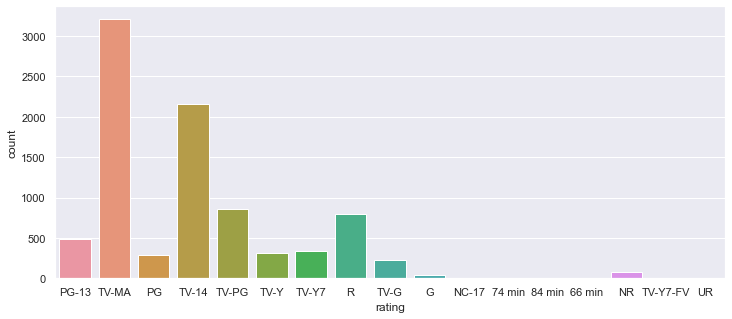

In [26]:
sns.countplot(x=data2['rating'])

<AxesSubplot:ylabel='Count'>

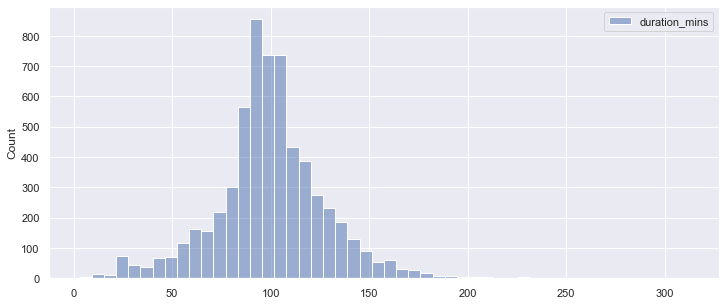

In [27]:
sns.histplot(data=movie_duration,bins=50)

### For categorical variable(s): Boxplot 

<AxesSubplot:ylabel='duration_mins'>

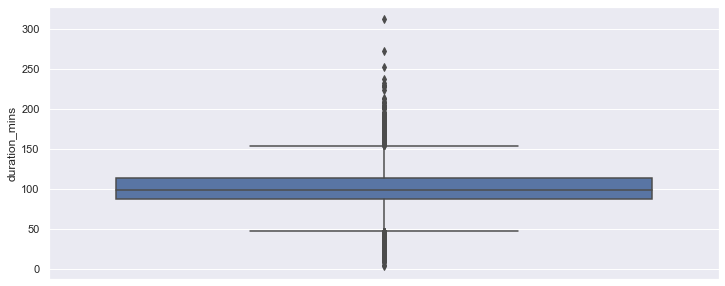

In [28]:
sns.boxplot(y=movie_duration['duration_mins'])

### For correlation: Heatmaps, Pairplots 

<AxesSubplot:>

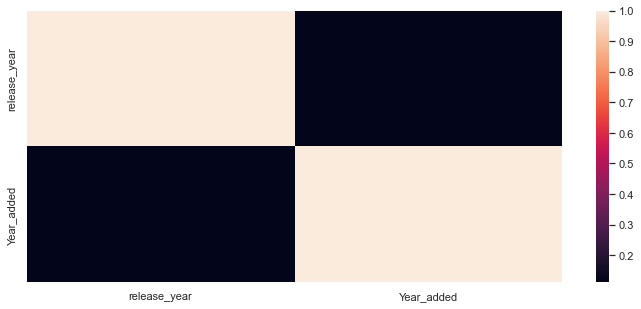

In [29]:
sns.heatmap(data2.corr())

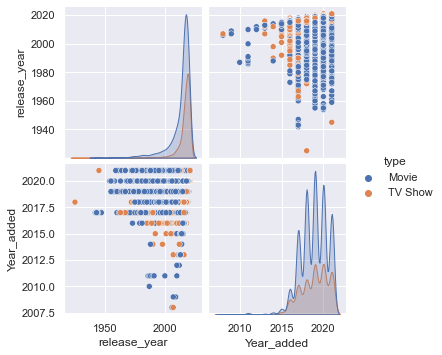

In [30]:
sns.pairplot(data2, hue="type")

### Missing Value & Outlier check 

In [31]:
missing_dir=data2['director'].isna().sum()
missing_cast=data2['cast'].isna().sum()
print("count of shows for missing director :",missing_dir)
print("count of shows for missing cast :",missing_cast)

count of shows for missing director : 2634
count of shows for missing cast : 825


<AxesSubplot:ylabel='Year_added'>

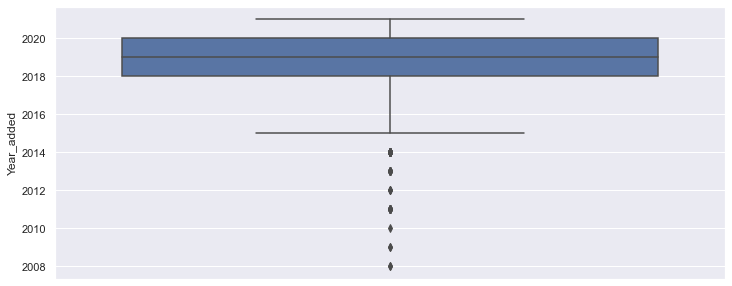

In [32]:
sns.boxplot(y=data2['Year_added'])

> Most of the movies are added between 2015 and 2021. Outliers shown are movies added before year - 2014.

### Insights based on Non-Graphical and Visual Analysis
- Comments on the range of attributes
- Comments on the distribution of the variables and relationship between them
- Comments for each univariate and bivariate plot


    1. The dataset is for most of the movies/TV shows added between 2014 & 2021. However, few of them are added between 2018 & 2014 as well.
    2. United States produces most number of movies/shows which are added on the platform
    3. From distplot,we can observe that most of the movie length is around 90-100 mins
    4. From countplot, we can see that TV-MA rated shows are mostly available followed by TV-14
    5. Most of the movies length ranges from 50-150 mins, however, there are outliers as well to the both side of the spectra.

### Business Insights

    1.Most popular actor-director pair for movies across India - Anupam Kher & David Dhawan
    2.After 2019 year, the number of movies being added on Netflix start dropping drastically
    3.Ken Burns TV show director is most popular over the platform
    4.Anupam Kher has starred in a maximum number of Netflix movies
    5.Most of the TV shows available to watch are rated as TV-MA
    6.2 Seasons is the average duration of TV shows present on Netflix

### Recommendations

    1.The target audience in USA is recommended to be MA
    2.The target audience in India is recommended to be 14+
    3.Drama & Comedy are the most popular genres across the countries
    4.International Movies/TV Show are quite popular across all countries
    5.Japanese usually prefer watching Anime, so this genre of movie/shows can be added